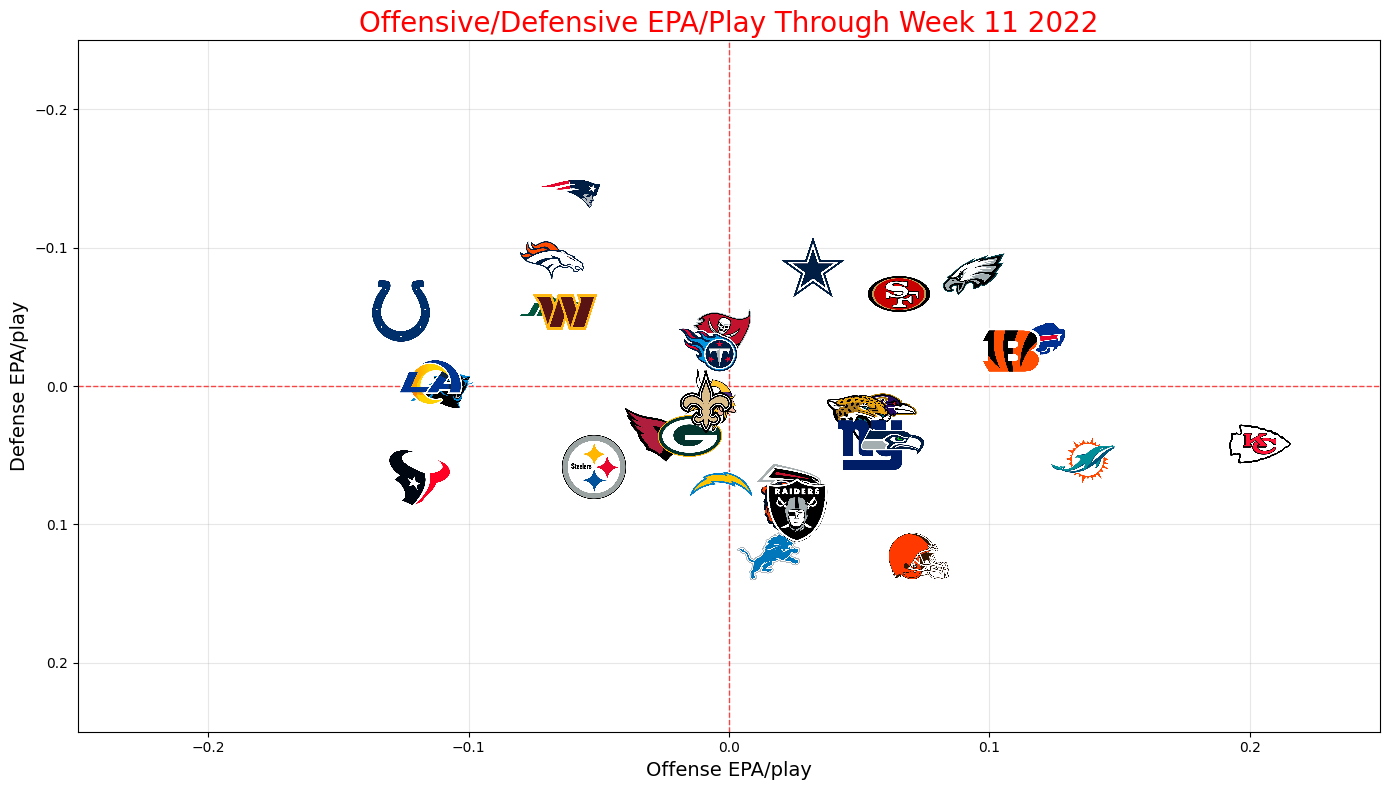

In [24]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pandas as pd
import requests
from PIL import Image
from io import BytesIO

data = pd.read_csv('C:/Users/RaymondCarpenter/Documents/GitHub/14thstreetanalytics/chiefs_study_through_week_11_2024/imposter_comparison.csv')

# NFL team logo URLs
nfl_teams = [
    {"team": "ARI", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/ari.png&h=500&w=500","hex": "#97233F"},
    {"team": "ATL", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/atl.png&h=500&w=500","hex": "#a71930"},
    {"team": "BAL", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/bal.png&h=500&w=500","hex": "#241773"},
    {"team": "BUF", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/buf.png&h=500&w=500","hex": "#00338D"},
    {"team": "CAR", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/car.png&h=500&w=500","hex": "#0085CA"},
    {"team": "CHI", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/chi.png&h=500&w=500","hex": "#0B162A"},
    {"team": "CIN", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/cin.png&h=500&w=500","hex": "#fb4f14"},
    {"team": "CLE", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/cle.png&h=500&w=500","hex": "#311D00"},
    {"team": "DAL", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/dal.png&h=500&w=500","hex": "#041E42"},
    {"team": "DEN", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/den.png&h=500&w=500","hex": "#FB4F14"},
    {"team": "DET", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/det.png&h=500&w=500","hex": "#0076b6"},
    {"team": "GB", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/gb.png&h=500&w=500","hex": "#203731"},
    {"team": "HOU", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/hou.png&h=500&w=500","hex": "#03202f"},
    {"team": "IND", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/ind.png&h=500&w=500","hex": "#002C5F"},
    {"team": "JAX", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/jax.png&h=500&w=500","hex": "#006778"},
    {"team": "KC", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/kc.png&h=500&w=500","hex": "#E31837"},
    {"team": "LAC", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/lac.png&h=500&w=500","hex": "#0080C6"},
    {"team": "LA", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/lar.png&h=500&w=500","hex": "#003594"},
    {"team": "MIA", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/mia.png&h=500&w=500","hex": "#008E97"},
    {"team": "MIN", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/min.png&h=500&w=500","hex": "#4F2683"},
    {"team": "NE", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/ne.png&h=500&w=500","hex": "#002244"},
    {"team": "NO", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/no.png&h=500&w=500","hex": "#D3BC8D"},
    {"team": "NYG", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/nyg.png&h=500&w=500","hex": "#0B2265"},
    {"team": "NYJ", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/nyj.png&h=500&w=500","hex": "#125740"},
    {"team": "LV", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/lv.png&h=500&w=500","hex": "#000000"},
    {"team": "PHI", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/phi.png&h=500&w=500","hex": "#004C54"},
    {"team": "PIT", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/pit.png&h=500&w=500","hex": "#FFB612"},
    {"team": "SF", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/sf.png&h=500&w=500","hex": "#AA0000"},
    {"team": "SEA", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/sea.png&h=500&w=500","hex": "#002244"},
    {"team": "TB", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/tb.png&h=500&w=500","hex": "#D50A0A"},
    {"team": "TEN", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/ten.png&h=500&w=500","hex": "#0C2340"},
    {"team": "WAS", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/was.png&h=500&w=500","hex": "#5A1414"}
]

nfl_logo_dict = {team['team']: team['logo_url'] for team in nfl_teams}

def get_team_logo(team_abb: str):
    team_abb = team_abb.strip().upper()
    logo_url = nfl_logo_dict.get(team_abb, None)
    if logo_url:
        response = requests.get(logo_url)
        if response.status_code == 200:
            return Image.open(BytesIO(response.content))
        else:
            print(f"Failed to retrieve logo for {team_abb}")
    else:
        print(f"No logo URL found for {team_abb}")
    return None
# Function to add logos to the plot
def add_team_logos(ax, x, y, teams):
    for i, team in enumerate(teams):
        logo = get_team_logo(team)  # Fetch the team logo using your function
        if logo:
            imagebox = OffsetImage(logo, zoom=0.1)  # Adjust zoom for logo size
            ab = AnnotationBbox(imagebox, (x[i], y[i]), frameon=False)
            ax.add_artist(ab)
# Filter data for 2023 season


data = data[data["year"] == 2022]
x_limits = (-0.25, 0.25) 
y_limits = (-0.25, 0.25) 
# Plot the NFL Tiers Chart for 2023
fig, ax = plt.subplots(figsize=(14, 8))
ax.scatter(
    data["off_epa_per_play"],
    data["def_epa_per_play"],
    alpha=0  # Points will be invisible since logos will replace them
)

# Fix add_team_logos function to use positional indexing
def add_team_logos(ax, x, y, teams):
    for i in range(len(teams)):
        logo = get_team_logo(teams.iloc[i])  # Use iloc for indexing
        if logo:
            imagebox = OffsetImage(logo, zoom=0.1)  # Adjust zoom for logo size
            ab = AnnotationBbox(imagebox, (x.iloc[i], y.iloc[i]), frameon=False)  # Use iloc for coordinates
            ax.add_artist(ab)

# Add logos to the plot
add_team_logos(ax, data["off_epa_per_play"], data["def_epa_per_play"], data["team"])

# Add red dashed lines for reference
ax.axhline(0, color="red", linestyle="--", linewidth=1, alpha=0.7)
ax.axvline(0, color="red", linestyle="--", linewidth=1, alpha=0.7)

# Titles and labels
ax.set_title("Offensive/Defensive EPA/Play Through Week 11 2022", fontsize=20, color="red")
ax.set_xlabel("Offense EPA/play", fontsize=14)
ax.set_ylabel("Defense EPA/play", fontsize=14)

ax.set_xlim(x_limits)
ax.set_ylim(y_limits)
ax.invert_yaxis()  # Lower defensive EPA is better

# Grid
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()



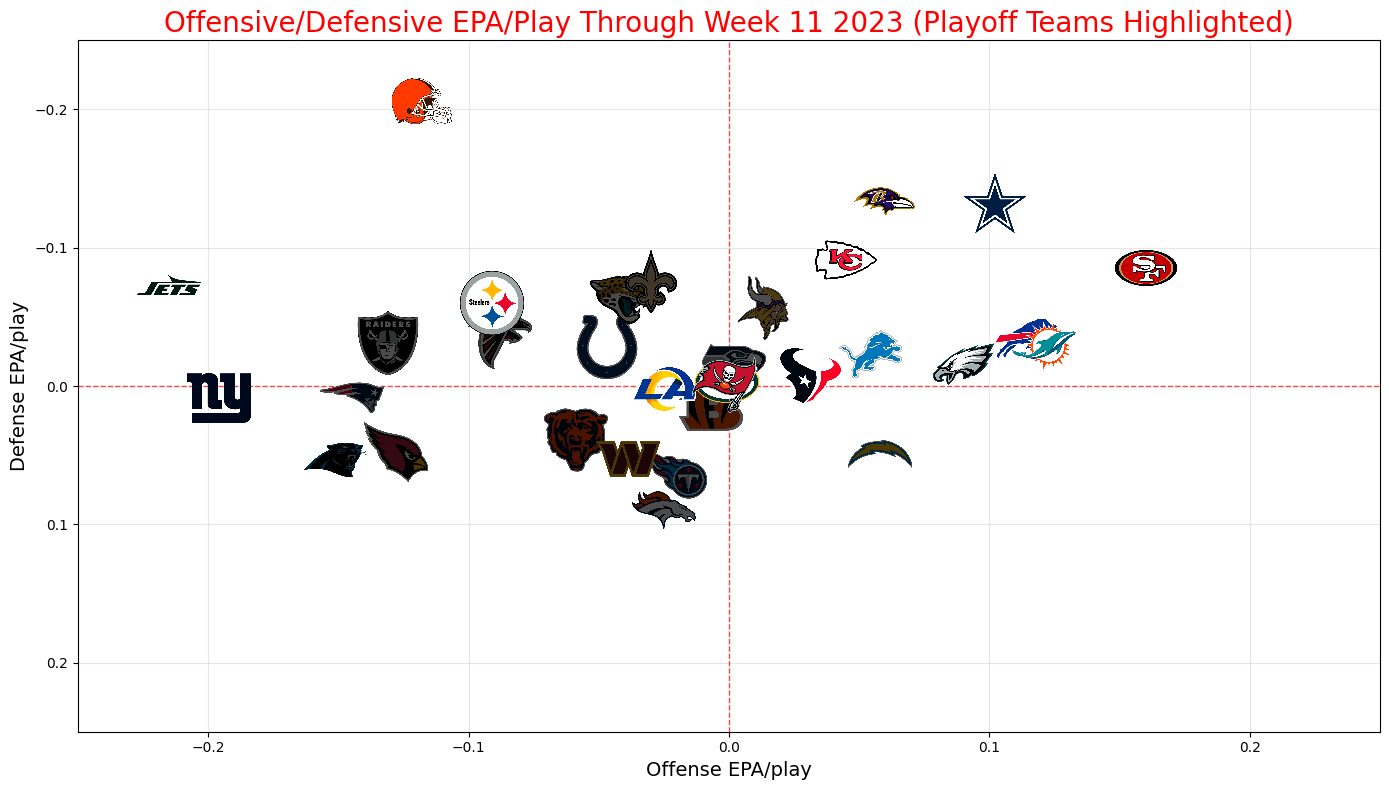

In [27]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pandas as pd
import requests
from PIL import Image, ImageEnhance
from io import BytesIO

# Load data
data = pd.read_csv('C:/Users/RaymondCarpenter/Documents/GitHub/14thstreetanalytics/chiefs_study_through_week_11_2024/imposter_comparison.csv')

# NFL team logo URLs
nfl_teams = [
    {"team": "ARI", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/ari.png&h=500&w=500","hex": "#97233F"},
    {"team": "ATL", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/atl.png&h=500&w=500","hex": "#a71930"},
    {"team": "BAL", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/bal.png&h=500&w=500","hex": "#241773"},
    {"team": "BUF", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/buf.png&h=500&w=500","hex": "#00338D"},
    {"team": "CAR", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/car.png&h=500&w=500","hex": "#0085CA"},
    {"team": "CHI", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/chi.png&h=500&w=500","hex": "#0B162A"},
    {"team": "CIN", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/cin.png&h=500&w=500","hex": "#fb4f14"},
    {"team": "CLE", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/cle.png&h=500&w=500","hex": "#311D00"},
    {"team": "DAL", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/dal.png&h=500&w=500","hex": "#041E42"},
    {"team": "DEN", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/den.png&h=500&w=500","hex": "#FB4F14"},
    {"team": "DET", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/det.png&h=500&w=500","hex": "#0076b6"},
    {"team": "GB", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/gb.png&h=500&w=500","hex": "#203731"},
    {"team": "HOU", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/hou.png&h=500&w=500","hex": "#03202f"},
    {"team": "IND", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/ind.png&h=500&w=500","hex": "#002C5F"},
    {"team": "JAX", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/jax.png&h=500&w=500","hex": "#006778"},
    {"team": "KC", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/kc.png&h=500&w=500","hex": "#E31837"},
    {"team": "LAC", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/lac.png&h=500&w=500","hex": "#0080C6"},
    {"team": "LA", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/lar.png&h=500&w=500","hex": "#003594"},
    {"team": "MIA", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/mia.png&h=500&w=500","hex": "#008E97"},
    {"team": "MIN", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/min.png&h=500&w=500","hex": "#4F2683"},
    {"team": "NE", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/ne.png&h=500&w=500","hex": "#002244"},
    {"team": "NO", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/no.png&h=500&w=500","hex": "#D3BC8D"},
    {"team": "NYG", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/nyg.png&h=500&w=500","hex": "#0B2265"},
    {"team": "NYJ", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/nyj.png&h=500&w=500","hex": "#125740"},
    {"team": "LV", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/lv.png&h=500&w=500","hex": "#000000"},
    {"team": "PHI", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/phi.png&h=500&w=500","hex": "#004C54"},
    {"team": "PIT", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/pit.png&h=500&w=500","hex": "#FFB612"},
    {"team": "SF", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/sf.png&h=500&w=500","hex": "#AA0000"},
    {"team": "SEA", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/sea.png&h=500&w=500","hex": "#002244"},
    {"team": "TB", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/tb.png&h=500&w=500","hex": "#D50A0A"},
    {"team": "TEN", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/ten.png&h=500&w=500","hex": "#0C2340"},
    {"team": "WAS", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/was.png&h=500&w=500","hex": "#5A1414"}
]

nfl_logo_dict = {team['team']: team['logo_url'] for team in nfl_teams}

def get_team_logo(team_abb: str, is_playoff: bool):
    logo_url = nfl_logo_dict.get(team_abb)
    if logo_url:
        response = requests.get(logo_url)
        if response.status_code == 200:
            logo = Image.open(BytesIO(response.content))
            if not is_playoff:
                enhancer = ImageEnhance.Brightness(logo)
                logo = enhancer.enhance(0.3)  # Dim for non-playoff teams
            return logo
    return None

# Plot the NFL Tiers Chart for 2022
fig, ax = plt.subplots(figsize=(14, 8))

# Filter data for 2022
data_2022 = data[data["year"] == 2023]
x_limits = (-0.25, 0.25) 
y_limits = (-0.25, 0.25) 
# Plot logos
for _, row in data_2022.iterrows():
    logo = get_team_logo(row["team"], row["made_playoffs"] == 1)  # Determine if the team made the playoffs
    if logo:
        imagebox = OffsetImage(logo, zoom=0.1)  # Adjust zoom for logo size
        ab = AnnotationBbox(imagebox, (row["off_epa_per_play"], row["def_epa_per_play"]), frameon=False)
        ax.add_artist(ab)

# Add red dashed lines for reference
ax.axhline(0, color="red", linestyle="--", linewidth=1, alpha=0.7)
ax.axvline(0, color="red", linestyle="--", linewidth=1, alpha=0.7)

# Titles and labels
ax.set_xlim(x_limits)
ax.set_ylim(y_limits)
ax.set_title("Offensive/Defensive EPA/Play Through Week 11 2023 (Playoff Teams Highlighted)", fontsize=20, color="red")
ax.set_xlabel("Offense EPA/play", fontsize=14)
ax.set_ylabel("Defense EPA/play", fontsize=14)
ax.invert_yaxis()  # Lower defensive EPA is better

# Grid
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


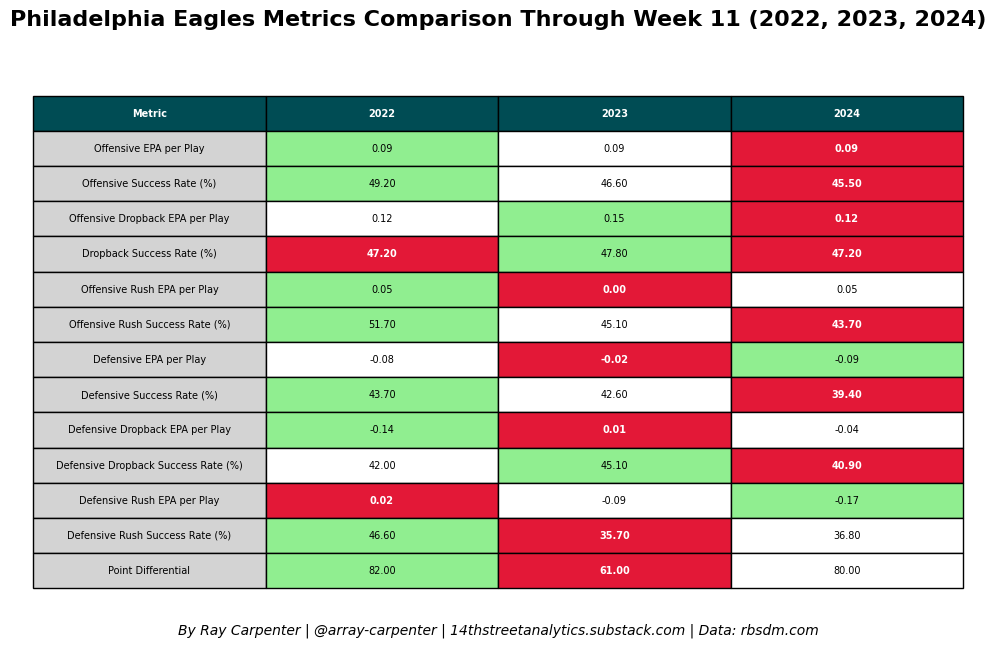

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Read the CSV file (assuming the file is saved at the given path)
file_path = 'C:/Users/RaymondCarpenter/Documents/GitHub/14thstreetanalytics/chiefs_study_through_week_11_2024/imposter_comparison.csv'
data = pd.read_csv(file_path)

# Filter data for Kansas City Chiefs across the three years
kc_data = data[data['team'] == 'PHI']
kc_data = kc_data[['year', 'off_epa_per_play', 'off_sr', 'off_dropback_epa_per_play', 
                   'dropback_sr', 'off_rush_epa_per_play', 'off_rush_st', 
                   'def_epa_per_play', 'def_sr', 'def_dropback_epa_per_play', 
                   'def_dropback_sr', 'def_rush_epa_per_play', 'def_rush_sr', 'pd']]

# Rename row headers to proper names
row_names = {
    'off_epa_per_play': 'Offensive EPA per Play',
    'off_sr': 'Offensive Success Rate (%)',
    'off_dropback_epa_per_play': 'Offensive Dropback EPA per Play',
    'dropback_sr': 'Dropback Success Rate (%)',
    'off_rush_epa_per_play': 'Offensive Rush EPA per Play',
    'off_rush_st': 'Offensive Rush Success Rate (%)',
    'def_epa_per_play': 'Defensive EPA per Play',
    'def_sr': 'Defensive Success Rate (%)',
    'def_dropback_epa_per_play': 'Defensive Dropback EPA per Play',
    'def_dropback_sr': 'Defensive Dropback Success Rate (%)',
    'def_rush_epa_per_play': 'Defensive Rush EPA per Play',
    'def_rush_sr': 'Defensive Rush Success Rate (%)',
    'pd': 'Point Differential'
}
kc_data.rename(columns=row_names, inplace=True)

# Transpose the data for table formatting
kc_data_transposed = kc_data.set_index('year').T
kc_data_transposed.columns = ['2022', '2023', '2024']

# Convert percentages and numeric values
for col in kc_data_transposed.columns:
    kc_data_transposed[col] = kc_data_transposed[col].replace('%', '', regex=True).astype(float)

# Create the plot for the table
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_axis_off()
table = Table(ax, bbox=[0, 0.1, 1, 0.8])  # Adjust bbox to leave space for footer

# Define metrics for which lower values are better
lower_is_better = [
    'Defensive EPA per Play',
    'Defensive Dropback EPA per Play',
    'Defensive Rush EPA per Play'
]

# Add table headers
ncols = len(kc_data_transposed.columns) + 1
nrows = len(kc_data_transposed.index) + 1
col_width = 1 / ncols
row_height = 1 / nrows

# Add cells to the table
for i, row in enumerate(kc_data_transposed.itertuples()):
    metric = kc_data_transposed.index[i]
    table.add_cell(i + 1, 0, col_width, row_height, text=metric, loc='center', facecolor='lightgray')
    values = row[1:]
    if metric in lower_is_better:
        # For metrics where lower is better, invert min/max logic
        min_val = max(values)
        max_val = min(values)
    else:
        min_val = min(values)
        max_val = max(values)
    for j, value in enumerate(values):
        color = '#E31837' if value == min_val else ('#90EE90' if value == max_val else 'white')
        cell = table.add_cell(i + 1, j + 1, col_width, row_height, text=f"{value:.2f}", loc='center', facecolor=color)
        
        # Ensure text color is white for red cells
        if color == '#E31837':
            cell.get_text().set_color('white')
            cell.get_text().set_weight('bold')


# Add header row with custom background and text color
for i, col in enumerate(['Metric'] + list(kc_data_transposed.columns)):
    header_cell = table.add_cell(
        0, i, col_width, row_height, 
        text=col, 
        loc='center', 
        facecolor='#004C54', 
        edgecolor='black'
    )
    
    header_cell.get_text().set_color('#FFFFFF')
    header_cell.get_text().set_weight('bold')

# Add footer text
plt.text(0.5, 0.02, "By Ray Carpenter | @array-carpenter | 14thstreetanalytics.substack.com | Data: rbsdm.com",
         ha='center', va='bottom', fontsize=10, style='italic')

# Finalize the table
ax.add_table(table)
plt.title("Philadelphia Eagles Metrics Comparison Through Week 11 (2022, 2023, 2024)", fontsize=16, weight='bold')
plt.show()